# NASA Turbofan Engine Useful Lifecycle Prediction

## Import Required Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
col_name = ['EngineNo', 'Cycle']
opt_settings = ['OpSet1', 'OpSet2', 'OpSet3']
sensor_data = ['FanInletTemp', 'LPCOutletTemp', 'HPCOutletTemp', 'LPTOutletTemp', 'FanInletPressure',
              'ByPassDuctPressure', 'TotalHPCOutletPressure', 'PhysicalFanSpeed', 'PhysicalCoreSpeed',
              'EnginePressureRatio', 'StaticHPCOutletPressure', 'FuelFlowRatio', 'CorctFanSpeed', 'CorctCoreSpeed', 'BPR', 
              'BurnerFuelRatio', 'BleedEnthalpy', 'DemandFanSpeed', 'DemandCorctFanSpeed', 'HPTCoolantBleed', 'LPTCoolantBleed']

In [3]:
# column_names = ['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 
#               'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9', 'SensorMeasure10', 'SensorMeasure11', 
#               'SensorMeasure12', 'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18', 
#               'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21']
# how to read txt file with more than one space or tab: From https://stackoverflow.com/questions/22809061/read-space-separated-data-with-pandas
df = pd.read_csv('CMAPSSData/train_FD001.txt', sep='\s+', header=None, names=col_name+opt_settings+sensor_data)

In [4]:
df

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [5]:
df[df.EngineNo==2]

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed
192,2,1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,14.62,...,522.33,2388.06,8137.72,8.3905,0.03,391,2388,100.0,38.94,23.4585
193,2,2,0.0043,-0.0003,100.0,518.67,641.82,1587.05,1393.13,14.62,...,522.70,2387.98,8131.09,8.4167,0.03,392,2388,100.0,39.06,23.4085
194,2,3,0.0018,0.0003,100.0,518.67,641.55,1588.32,1398.96,14.62,...,522.58,2387.99,8140.58,8.3802,0.03,391,2388,100.0,39.11,23.4250
195,2,4,0.0035,-0.0004,100.0,518.67,641.68,1584.15,1396.08,14.62,...,522.49,2387.93,8140.44,8.4018,0.03,391,2388,100.0,39.13,23.5027
196,2,5,0.0005,0.0004,100.0,518.67,641.73,1579.03,1402.52,14.62,...,522.27,2387.94,8136.67,8.3867,0.03,390,2388,100.0,39.18,23.4234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,2,283,0.0046,0.0002,100.0,518.67,643.78,1602.03,1429.67,14.62,...,520.07,2388.20,8174.85,8.5199,0.03,398,2388,100.0,38.42,23.0358
475,2,284,-0.0006,0.0001,100.0,518.67,643.91,1601.35,1430.04,14.62,...,519.95,2388.21,8166.83,8.5291,0.03,395,2388,100.0,38.23,23.1196
476,2,285,-0.0007,0.0004,100.0,518.67,643.67,1596.84,1431.17,14.62,...,519.91,2388.22,8164.83,8.5242,0.03,396,2388,100.0,38.39,23.1155
477,2,286,-0.0010,-0.0003,100.0,518.67,643.44,1603.63,1429.57,14.62,...,519.51,2388.22,8169.97,8.4932,0.03,395,2388,100.0,38.33,23.0169


In [6]:
df.describe()

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


- It shows that this dataset has 100 engines. 
- The maximum life of one of the engine is 362.

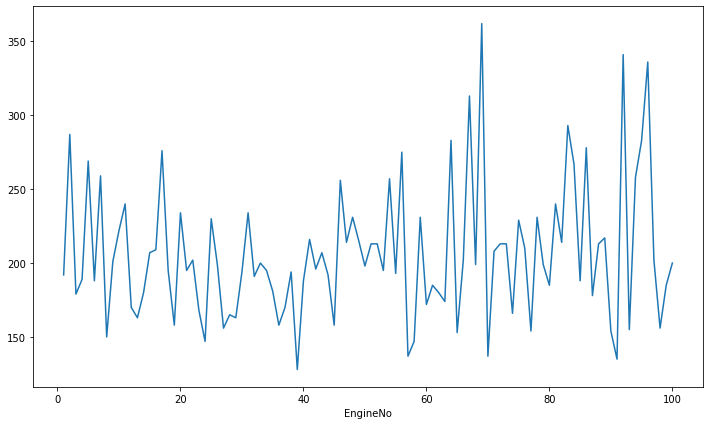

In [7]:
# sns.scatterplot(df.groupby('ID').size())
# df.groupby('ID').size().values
plt.figure(figsize=(12, 7))
sns.lineplot(x=df.groupby('EngineNo').size().index, y=df.groupby('EngineNo').size().values)
plt.show()

In [8]:
df.groupby(['EngineNo']).max().describe()

,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,ByPassDuctPressure,...,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed
count,100.000000,100.000000,100.000000,100.0,100.00,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,...,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,100.0,100.0,100.000000,100.000000
mean,206.310000,0.005986,0.000497,100.0,518.67,644.108800,1608.073100,1434.506400,1.462000e+01,2.161000e+01,...,522.593200,2388.285100,8179.481200,8.547498,0.03,397.580000,2388.0,100.0,39.167800,23.498315
std,46.342749,0.000883,0.000056,0.0,0.00,0.141773,2.446053,2.323773,1.785306e-15,1.071183e-14,...,0.422197,0.073368,43.595736,0.012937,0.00,0.684312,0.0,0.0,0.091625,0.057682
min,128.000000,0.004000,0.000400,100.0,518.67,643.870000,1604.070000,1429.260000,1.462000e+01,2.161000e+01,...,521.770000,2388.170000,8128.370000,8.517100,0.03,396.000000,2388.0,100.0,38.970000,23.375000
25%,177.000000,0.005375,0.000500,100.0,518.67,644.010000,1606.362500,1432.647500,1.462000e+01,2.161000e+01,...,522.237500,2388.230000,8147.500000,8.537525,0.03,397.000000,2388.0,100.0,39.100000,23.454375
50%,199.000000,0.005900,0.000500,100.0,518.67,644.090000,1607.685000,1434.230000,1.462000e+01,2.161000e+01,...,522.580000,2388.280000,8157.700000,8.548250,0.03,397.500000,2388.0,100.0,39.155000,23.498900
75%,229.250000,0.006425,0.000500,100.0,518.67,644.190000,1609.350000,1436.275000,1.462000e+01,2.161000e+01,...,523.000000,2388.330000,8215.420000,8.556250,0.03,398.000000,2388.0,100.0,39.232500,23.543200
max,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,2.161000e+01,...,523.380000,2388.560000,8293.720000,8.584800,0.03,400.000000,2388.0,100.0,39.430000,23.618400


***
***

## EDA

In [9]:
df.describe()

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [10]:
cumulative_frequency = df.describe().transpose()

In [11]:
(cumulative_frequency.iloc[:,2]/cumulative_frequency.iloc[:,1])

EngineNo                   5.674545e-01
Cycle                      6.330516e-01
OpSet1                    -2.465927e+02
OpSet2                     1.246632e+02
OpSet3                     0.000000e+00
FanInletTemp               0.000000e+00
LPCOutletTemp              7.780739e-04
HPCOutletTemp              3.854801e-03
LPTOutletTemp              6.388238e-03
FanInletPressure           1.215048e-16
ByPassDuctPressure         6.427569e-05
TotalHPCOutletPressure     1.599465e-03
PhysicalFanSpeed           2.972471e-05
PhysicalCoreSpeed          2.435994e-03
EnginePressureRatio        0.000000e+00
StaticHPCOutletPressure    5.618023e-03
FuelFlowRatio              1.414527e-03
CorctFanSpeed              3.011559e-05
CorctCoreSpeed             2.342431e-03
BPR                        4.442595e-03
BurnerFuelRatio            4.626041e-16
BleedEnthalpy              3.938762e-03
DemandFanSpeed             0.000000e+00
DemandCorctFanSpeed        0.000000e+00
HPTCoolantBleed            4.656460e-03


- It can be noticed that for Operational setting 3, FanInletTemp, EnginePressureRatio, DemandFanSpeed and DemandCorctFanSpeed have no variance.
- From above it can be seen Sensors 5 and 16 have high variation.
    - But if noticed it can be seen this is because the value of std for FanInletPressure and BurnerFuelRatio is close to zero.
    - This concludes that FanInletPressure and BurnerFuelRatio also don't hold much of value

In [12]:
df.FanInletPressure.unique()

array([14.62])

In [13]:
df.BurnerFuelRatio.unique()

array([0.03])

### Create a column for Remaining Useful Lifecycle

In [14]:
df

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [15]:
# From the grouped data, use the cycle coulmn and find the max 
max_cycle = df.groupby('EngineNo')['Cycle'].max()

In [16]:
# Merge the max cycle column with the df column
df_rul = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='EngineNo', right_index=True)

In [17]:
df_rul

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed,max_cycle
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200


In [18]:
df_life_ratio = df_rul.copy()
df_life_ratio['LifeRatio'] = df_life_ratio.Cycle/df_life_ratio.max_cycle
df_rul['RUL'] = df_rul.max_cycle - df_rul.Cycle
df_rul.drop('max_cycle', axis=1, inplace=True)

In [19]:
df_rul

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [20]:
# Here we can see the remaining_cycle getting reduced
df_rul[['EngineNo','Cycle','RUL']]

,EngineNo,Cycle,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187
...,...,...,...
20626,100,196,4
20627,100,197,3
20628,100,198,2
20629,100,199,1


In [21]:
df_max_rul = df_rul[['EngineNo', 'RUL']].groupby('EngineNo').max().reset_index()

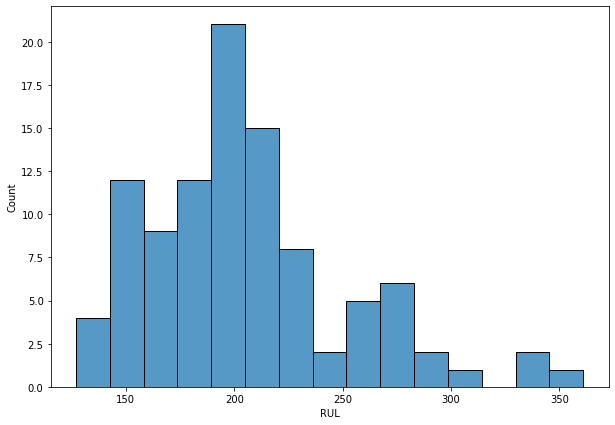

In [22]:
plt.figure(figsize=(10,7))
sns.histplot(x=df_max_rul.RUL, bins=15)
plt.show()

- Most of the engines fail after 200 cycles.
- Some engines have a life cycle of more than 300.

In [23]:
df_rul[df_rul.EngineNo==1]

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588,4
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127,3
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675,2
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295,1


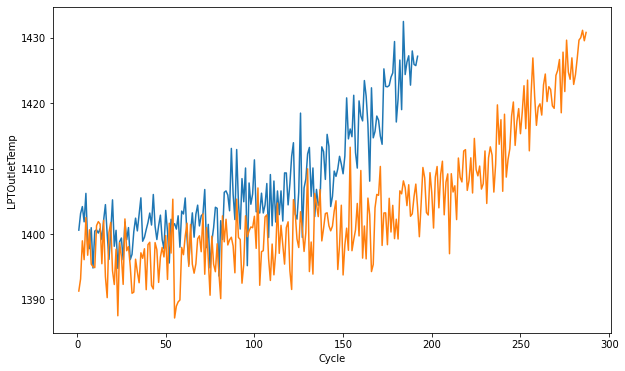

In [24]:
# Plot for engine 1 and engine 2 for LPTOutletTemp
plt.figure(figsize=(10,6))
sns.lineplot(x='Cycle', y='LPTOutletTemp', data=df_rul[df_rul.EngineNo==1])
sns.lineplot(x='Cycle', y='LPTOutletTemp', data=df_rul[df_rul.EngineNo==2])
plt.show()

In [25]:
def plot_for_engine(eng_num):
    '''
    A function to plot all sensor reading by giving the engine number as the input.
    '''
    fig, ax = plt.subplots(7,3, figsize=(20,26))
    count = 0
    for i in range(7):
        for j in range(3):
            # sen_num = 'SensorMeasure'+str(count)
            sns.lineplot(ax=ax[i,j],x='Cycle', y=sensor_data[count], data=df_rul[df_rul.EngineNo==eng_num])
            count+=1
    plt.savefig('engine'+str(eng_num)+'.png')

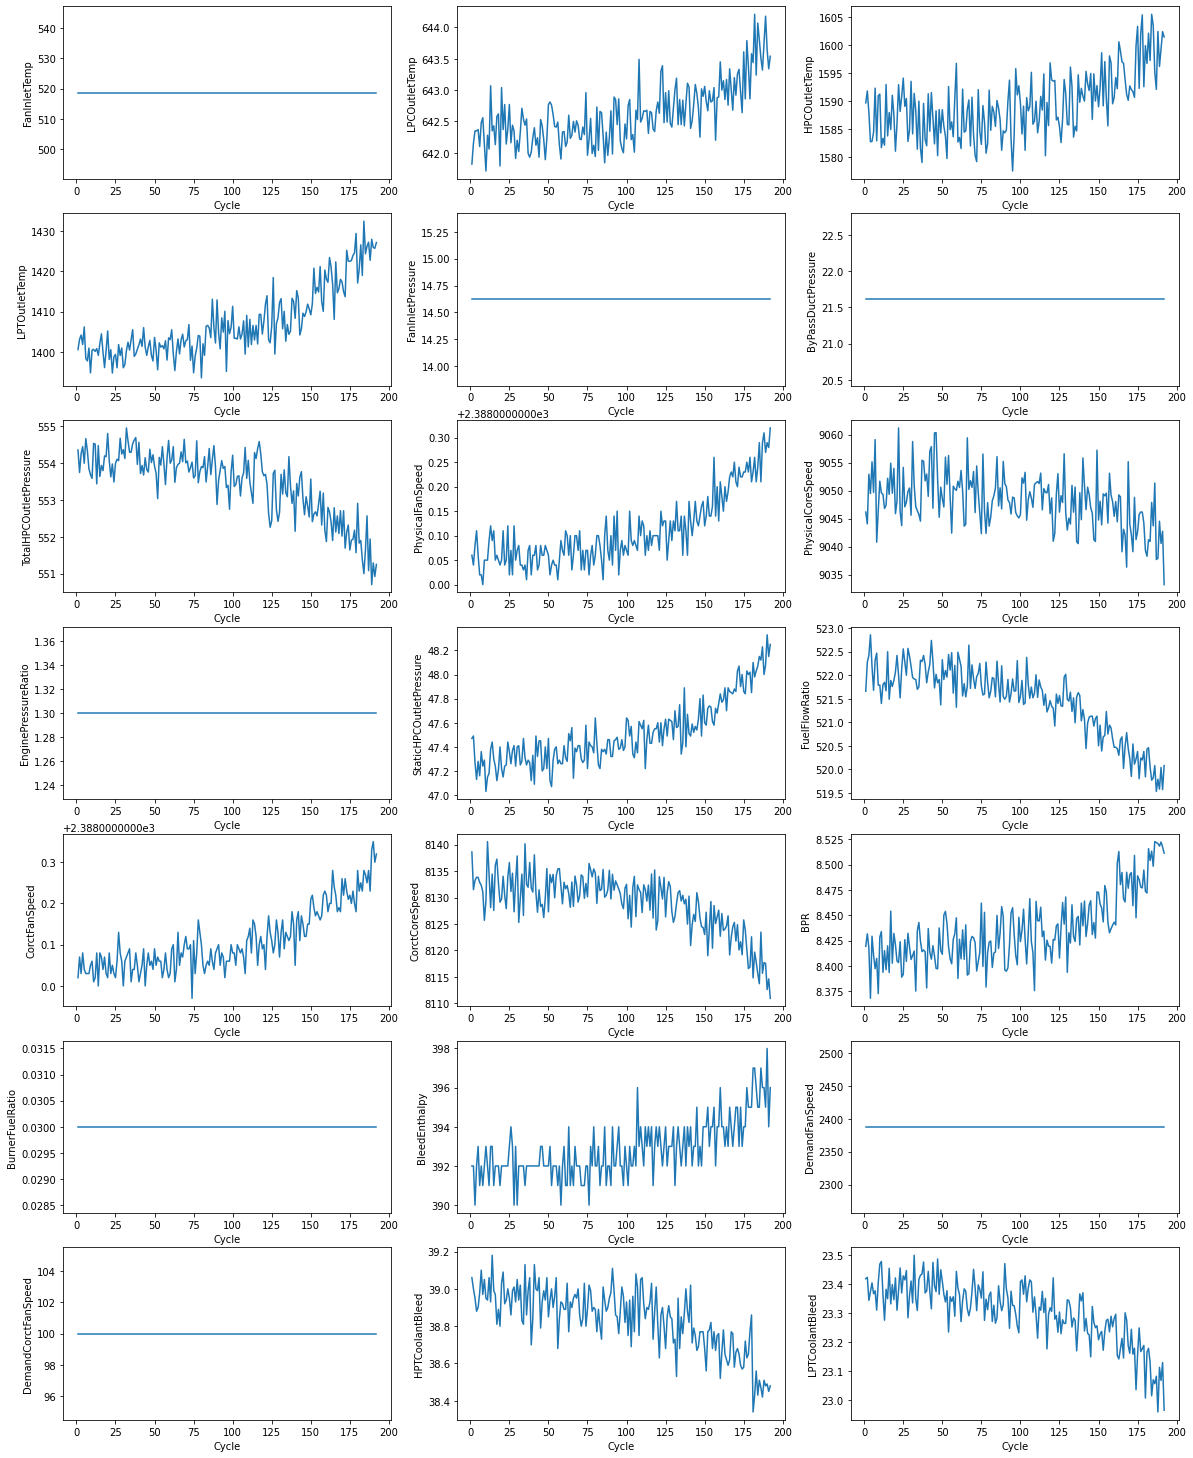

In [26]:
plot_for_engine(1)

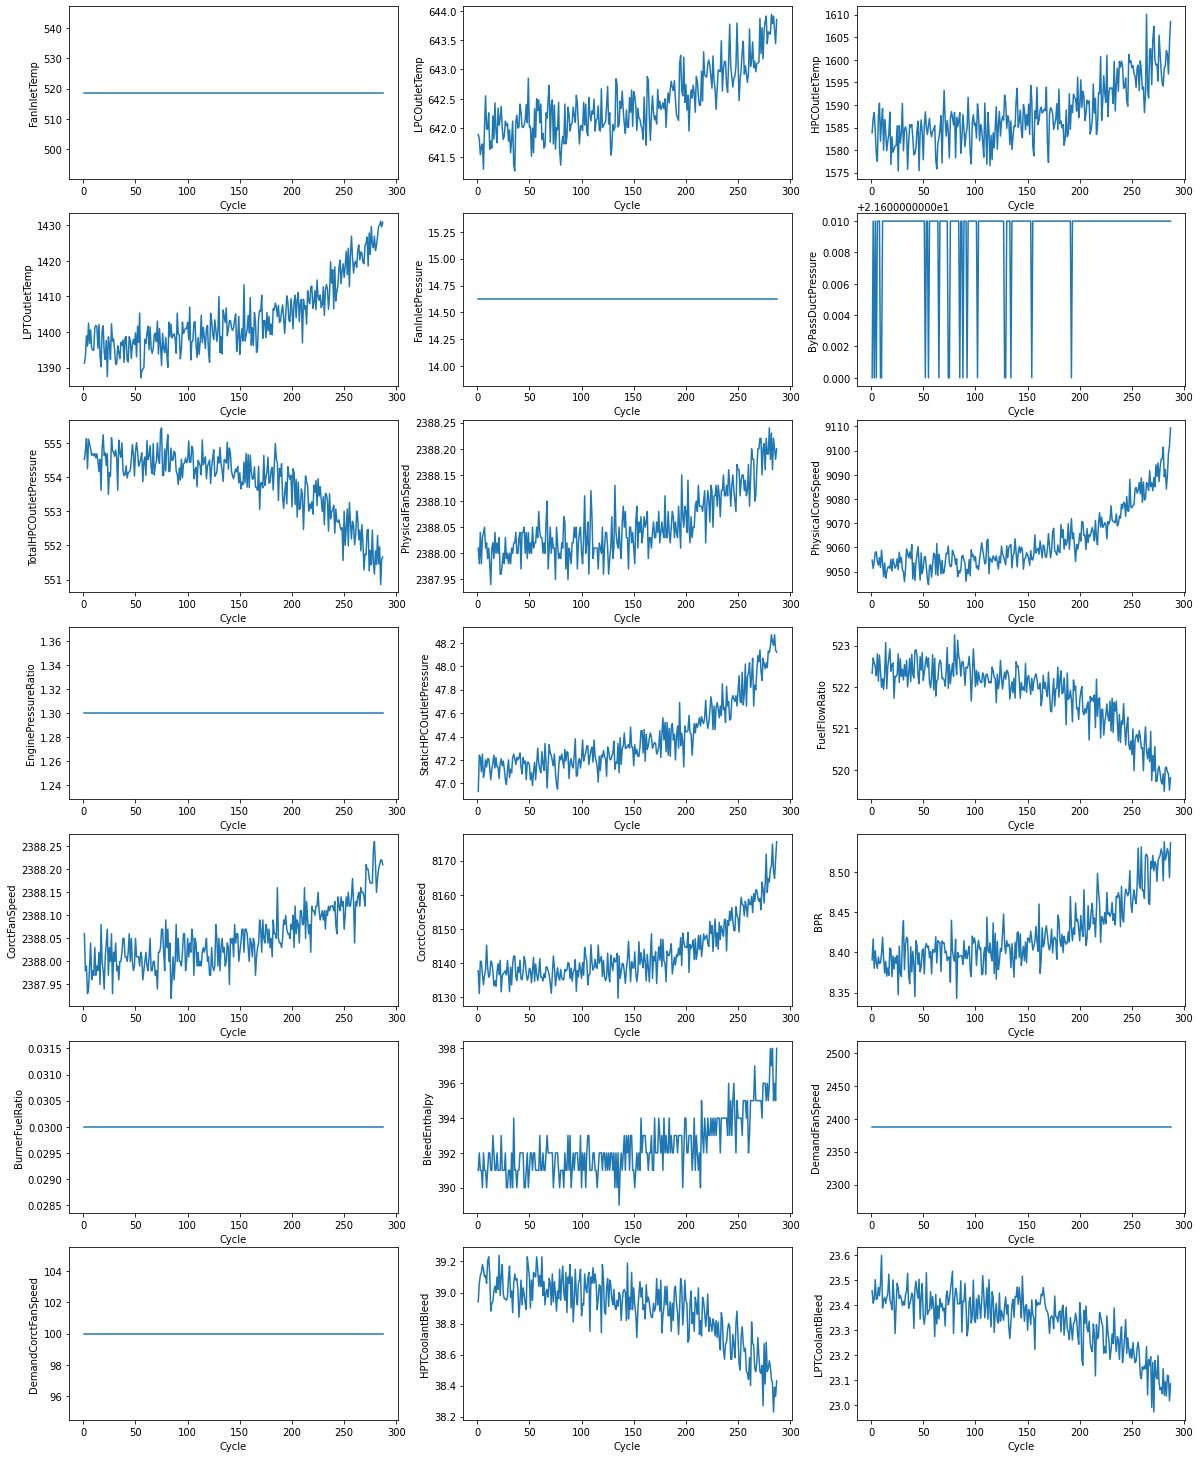

In [27]:
plot_for_engine(2)

- The following sensors shows no variation - this can be discaded from further studies:
    - FanInletTemp
    - FanInletPressure
    - ByPassDuctPressure
    - EnginePressureRatio
    - BurnerFuelRatio
    - DemandFanSpeed
    - DemandCorctFanSpeed

In [28]:
def plot_for_sensor(parameter, eng_nums):
    '''
    A function to plot single sensor data from multiple engines
    Inputs: Sensor number and Engine Numbers as list
    '''
    plt.figure(figsize=(10,6))
    for i in eng_nums:
        sns.lineplot(x='Cycle', y=parameter, data=df_rul[df_rul.EngineNo==i])
    plt.legend(labels=eng_nums, title='Engine Numbers')

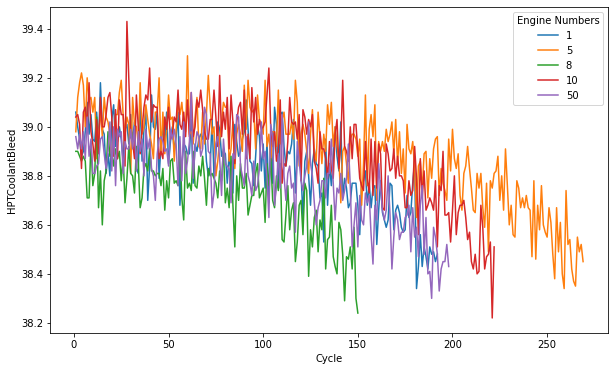

In [29]:
plot_for_sensor('HPTCoolantBleed',[1,5,8,10,50])

In [30]:
def engine_rating(LifeRatio):
    if LifeRatio <= 0.3:
        eng_cond = 'Good'
    elif LifeRatio >0.3 and LifeRatio <=0.8:
        eng_cond = 'Medium'
    else:
        eng_cond = 'Bad'
    return eng_cond

In [31]:
df_life_ratio['Eng_condition'] = df_life_ratio.LifeRatio.apply(lambda x: engine_rating(x))

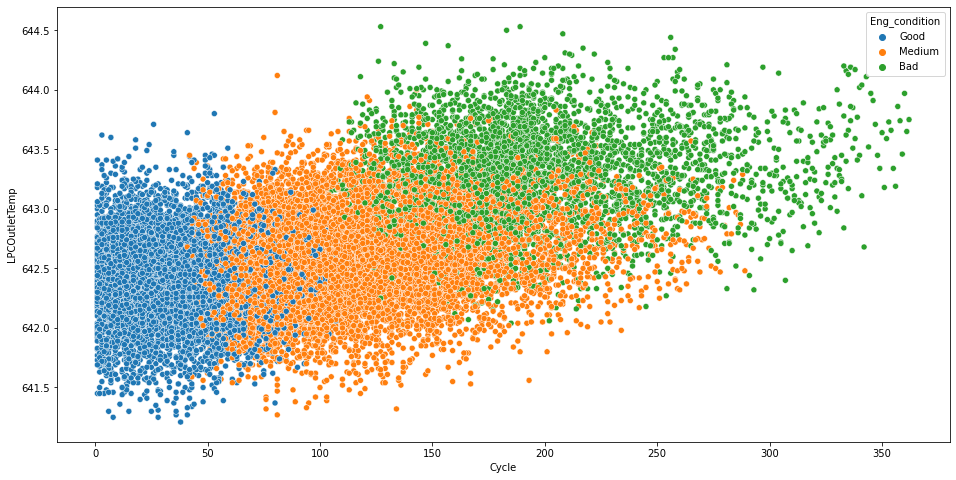

In [32]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='Cycle', y='LPCOutletTemp', data=df_life_ratio, hue='Eng_condition')
plt.show()

## Creating a Baseline Linear Regression Model

### Dropping irrelevant features

In [33]:
drop_columns_list = ['EngineNo','FanInletTemp', 'FanInletPressure', 'ByPassDuctPressure', 'EnginePressureRatio', 'BurnerFuelRatio', 
                     'DemandFanSpeed', 'DemandCorctFanSpeed'] + opt_settings

In [34]:
X_train = df_rul.drop(drop_columns_list, axis=1)
y_train = X_train.pop('RUL')

In [35]:
X_train

,Cycle,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,TotalHPCOutletPressure,PhysicalFanSpeed,PhysicalCoreSpeed,StaticHPCOutletPressure,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,BleedEnthalpy,HPTCoolantBleed,LPTCoolantBleed
0,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
20627,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
20628,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
20629,199,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


### Linear Regression without using class on unscaled dataset

In [36]:
lr = LinearRegression()

In [37]:
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred_train = lr.predict(X_train)

In [39]:
df_engine_cycle_slice = df_rul.groupby('EngineNo').last()[['Cycle']]

In [40]:
# Code block to create the slice of dataset w.r.t engine number
slice_index_start = []
slice_index_stop = []
temp = 0
for i in df_engine_cycle_slice.Cycle:
    # print(temp, i+temp)
    # slice_list.append(f'{temp},{i+temp}')
    slice_index_start.append(temp)
    slice_index_stop.append(i+temp)
    temp = i+temp

In [41]:
# Plot according to engine number
def plot_comp_yTrue_yPred_lr(eng_num):
    plt.figure(figsize=(8,6))
    eng_num = eng_num-1
    plt.scatter(X_train['Cycle'][slice_index_start[eng_num]:slice_index_stop[eng_num]], y_pred_train[slice_index_start[eng_num]:slice_index_stop[eng_num]])
    plt.scatter(X_train['Cycle'][slice_index_start[eng_num]:slice_index_stop[eng_num]], y_train[slice_index_start[eng_num]:slice_index_stop[eng_num]])
    plt.title(f'Comparision of True and Predicted for engine {eng_num}')
    plt.xlabel('Cycle')
    plt.ylabel('Cycle')
    plt.legend(labels=['Y_Pred', 'Y_True'])
    plt.show()
    evaluate(y_train[slice_index_start[eng_num]:slice_index_stop[eng_num]], y_pred_train[slice_index_start[eng_num]:slice_index_stop[eng_num]])

In [42]:
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f'MSE: {mse}, RMSE:{rmse}, r2:{r2}')

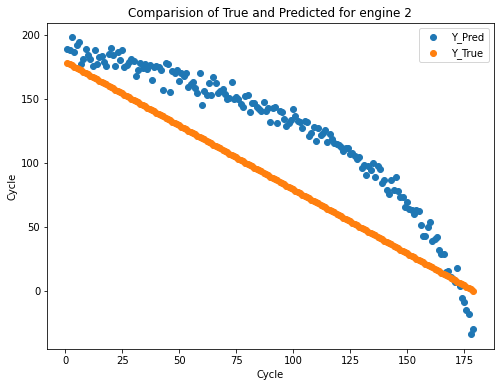

MSE: 1643.5590091344313, RMSE:40.540831381885, r2:0.3844348280395389


In [43]:
plot_comp_yTrue_yPred_lr(3)

In [44]:
df_test = pd.read_csv('CMAPSSData/test_FD001.txt', sep='\s+', header=None, names=col_name+opt_settings+sensor_data)

In [45]:
df_test

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [46]:
df_test = df_test.groupby('EngineNo').last().reset_index().drop(drop_columns_list, axis=1)

In [47]:
df_test

,Cycle,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,TotalHPCOutletPressure,PhysicalFanSpeed,PhysicalCoreSpeed,StaticHPCOutletPressure,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,BleedEnthalpy,HPTCoolantBleed,LPTCoolantBleed
0,31,642.58,1581.22,1398.91,554.42,2388.08,9056.40,47.23,521.79,2388.06,8130.11,8.4024,393,38.81,23.3552
1,49,642.55,1586.59,1410.83,553.52,2388.10,9044.77,47.67,521.74,2388.09,8126.90,8.4505,391,38.81,23.2618
2,126,642.88,1589.75,1418.89,552.59,2388.16,9049.26,47.88,520.83,2388.14,8131.46,8.4119,395,38.93,23.2740
3,106,642.78,1594.53,1406.88,552.64,2388.13,9051.30,47.65,521.88,2388.11,8133.64,8.4634,395,38.58,23.2581
4,98,642.27,1589.94,1419.36,553.29,2388.10,9053.99,47.46,521.00,2388.15,8125.74,8.4362,394,38.75,23.4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,97,642.30,1590.88,1397.94,553.99,2388.03,9062.41,47.14,522.30,2388.01,8148.24,8.4110,391,38.96,23.4606
96,134,642.59,1582.96,1410.92,554.05,2388.06,9076.36,47.38,521.58,2388.06,8155.48,8.4500,395,38.61,23.2953
97,121,642.68,1599.51,1415.47,553.44,2388.13,9062.34,47.66,521.53,2388.09,8146.39,8.4235,394,38.76,23.3608
98,97,642.00,1585.03,1397.98,554.75,2388.01,9067.16,47.26,521.82,2388.02,8150.38,8.4003,391,38.95,23.3595


In [48]:
df_test_rul = pd.read_csv('CMAPSSData/RUL_FD001.txt', header=None, names=['RUL'])

In [49]:
# The total RUL is the number of cycle from test data + RUL from data
# df_test_rul.remaining_cycle = df_test_rul.remaining_cycle + df_test.Cycle

In [50]:
test_rul = df_test_rul.to_numpy().reshape(100)

In [51]:
evaluate(y_train, y_pred_train)

MSE: 1634.9637838872795, RMSE:40.43468540606294, r2:0.6553879771970734


In [52]:
y_pred_test = lr.predict(df_test)

In [53]:
y_pred_test

array([ 1.69964063e+02,  1.38467800e+02,  8.39355157e+01,  1.01176434e+02,
        1.14241775e+02,  1.15175808e+02,  1.03731480e+02,  7.59351949e+01,
        1.30864410e+02,  7.95707461e+01,  1.08033387e+02,  7.04585663e+01,
        7.06216196e+01,  1.34059347e+02,  1.52213754e+02,  1.24971728e+02,
        7.37901083e+01,  7.92762544e+01,  1.06730697e+02,  2.44540957e+01,
        1.01769356e+02,  1.55571263e+02,  1.28559432e+02,  3.62491235e+01,
        1.49896900e+02,  1.45709631e+02,  1.06342436e+02,  8.84769547e+01,
        9.41388370e+01,  8.73266775e+01,  1.32470594e+01,  9.51472597e+01,
        1.29410882e+02,  3.57705258e+00,  2.70010687e+00,  5.52783555e+01,
        8.20960613e+01,  7.68908253e+01,  1.69620032e+02,  5.47082287e+01,
        8.84850065e+01,  4.12988919e+01,  6.43795296e+01,  1.34808781e+02,
        7.50554263e+01,  6.86204165e+01,  1.29111509e+02,  1.25560316e+02,
       -2.55507595e+01,  1.33501094e+02,  9.94950766e+01,  4.43709768e+01,
        5.10207630e+01,  

In [54]:
evaluate(test_rul, y_pred_test)

MSE: 969.0117251151456, RMSE:31.12895316446002, r2:0.4388622481308688


<AxesSubplot:>

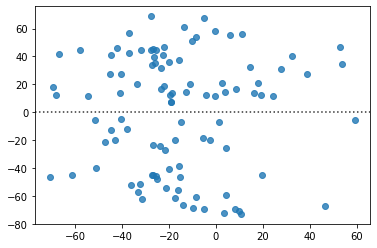

In [55]:
# Residual plots
# from https://stats.stackexchange.com/questions/463058/making-a-residual-plot-in-multiple-linear-regression
# how to interpret a residual plot https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/
sns.residplot(x=test_rul-y_pred_test, y=y_pred_test)

<AxesSubplot:>

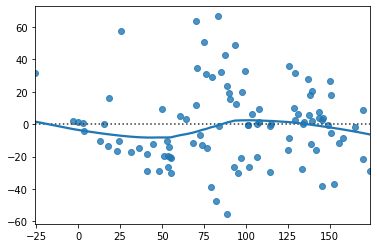

In [56]:
sns.residplot(x=y_pred_test, y=test_rul, lowess=True)

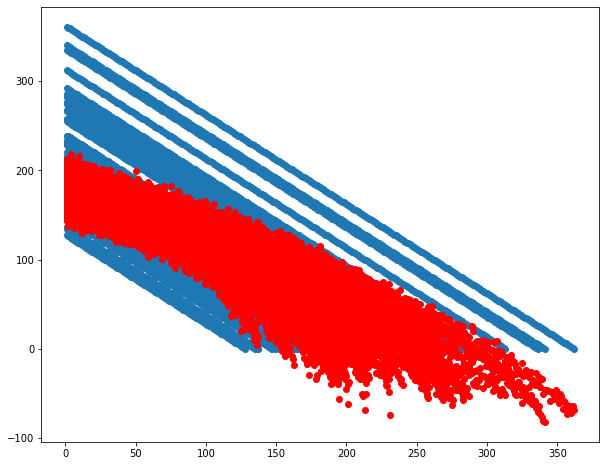

In [57]:
plt.figure(figsize=(10,8))
plt.scatter(df_rul.Cycle, df_rul.RUL)
plt.scatter(df_rul.Cycle, y_pred_train, color='red')
plt.show()

In [58]:
lr.coef_

array([ -0.39942503,  -5.3493229 ,  -0.26917154,  -0.44973397,
         4.21010017, -27.35148189,  -0.1649869 , -24.10277395,
         5.7461812 , -19.78735681,  -0.13629907, -80.3429586 ,
        -0.97899398,   9.82300609,  24.50055235])

### Linear Regression using the defined class Build_Model without Scaled Data

In [62]:
lr_without_scaling = Build_Model(lr, X_train, y_train, df_test, df_test_rul)

In [63]:
lr_without_scaling.evaluate_train_dataset()

(40.43468540606294,
 0.6553879771970734,
 array([181.67255052, 177.72164689, 183.70392905, ...,  -8.61634319,
        -12.68556112, -10.9211691 ]))

In [64]:
lr_without_scaling.evaluate_test_dataset()

(31.12895316446002,
 0.4388622481308688,
 array([ 1.69964063e+02,  1.38467800e+02,  8.39355157e+01,  1.01176434e+02,
         1.14241775e+02,  1.15175808e+02,  1.03731480e+02,  7.59351949e+01,
         1.30864410e+02,  7.95707461e+01,  1.08033387e+02,  7.04585663e+01,
         7.06216196e+01,  1.34059347e+02,  1.52213754e+02,  1.24971728e+02,
         7.37901083e+01,  7.92762544e+01,  1.06730697e+02,  2.44540957e+01,
         1.01769356e+02,  1.55571263e+02,  1.28559432e+02,  3.62491235e+01,
         1.49896900e+02,  1.45709631e+02,  1.06342436e+02,  8.84769547e+01,
         9.41388370e+01,  8.73266775e+01,  1.32470594e+01,  9.51472597e+01,
         1.29410882e+02,  3.57705258e+00,  2.70010687e+00,  5.52783555e+01,
         8.20960613e+01,  7.68908253e+01,  1.69620032e+02,  5.47082287e+01,
         8.84850065e+01,  4.12988919e+01,  6.43795296e+01,  1.34808781e+02,
         7.50554263e+01,  6.86204165e+01,  1.29111509e+02,  1.25560316e+02,
        -2.55507595e+01,  1.33501094e+02,  9.94

- This was done to validate the class Build_Model.
- Both the results are same. So the class is defined in a proper manner.

### Linear Regression using the scaled data

In [67]:
lr_with_scaling = Build_Model(lr, X_train_scaled, y_train, X_test_scaled, df_test_rul)

In [68]:
a,b,_ = lr_with_scaling.evaluate_train_dataset()

In [69]:
a

40.43468540606294

In [70]:
b

0.6553879771970734

In [71]:
a,b,_ = lr_without_scaling.evaluate_train_dataset(X_train_scaled, y_train)

In [72]:
a

40.43468540606294

In [73]:
b

0.6553879771970734

In [75]:
pca = PCA(3)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [78]:
X_train_scaled_pca.shape

(20631, 3)

In [76]:
a,b,_ = lr_with_scaling.evaluate_train_dataset(X_train_scaled_pca, y_train)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 15 is different from 3)

## PCA

- Here we are going to use PCA.
- Compare the first two dimension from PCA with data of engine at their last cycle - to see if we can group it

In [59]:
X_train

,Cycle,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,TotalHPCOutletPressure,PhysicalFanSpeed,PhysicalCoreSpeed,StaticHPCOutletPressure,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,BleedEnthalpy,HPTCoolantBleed,LPTCoolantBleed
0,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
20627,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
20628,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
20629,199,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


In [66]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(df_test)

In [61]:
pca = PCA()

In [62]:
pca.fit(X_train_scaled)

PCA()

In [63]:
pca.explained_variance_ratio_

array([0.63221951, 0.14447584, 0.0298353 , 0.02749335, 0.0245495 ,
       0.02304464, 0.02040658, 0.01932379, 0.01698895, 0.01373521,
       0.01300239, 0.01173678, 0.01149446, 0.00974226, 0.00195144])

In [64]:
pca.explained_variance_

array([9.4837523 , 2.16724261, 0.44755124, 0.4124203 , 0.36826034,
       0.34568638, 0.30611356, 0.28987092, 0.25484661, 0.20603814,
       0.19504531, 0.17606016, 0.17242522, 0.14614097, 0.02927303])

In [ ]:
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

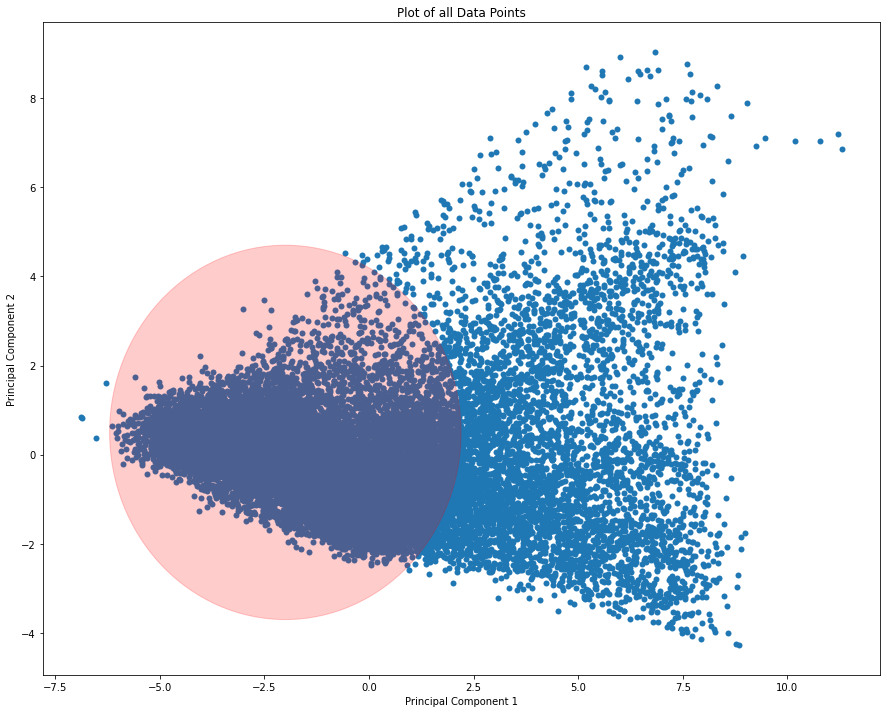

In [66]:
fig, ax = plt.subplots(figsize=(15,12))
plt.scatter(X_train_scaled_pca[:,0], X_train_scaled_pca[:,1], linewidths=0.001)
cicr= plt.Circle((-2, 0.5),4.2, alpha=0.2, color='red')
ax.add_artist(cicr)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Plot of all Data Points')
plt.show()

In [67]:
X_train

,Cycle,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,TotalHPCOutletPressure,PhysicalFanSpeed,PhysicalCoreSpeed,StaticHPCOutletPressure,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,BleedEnthalpy,HPTCoolantBleed,LPTCoolantBleed
0,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
20627,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
20628,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
20629,199,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


In [68]:
# Grouing and finding the last cycle rows from dataframe
drop_columns_list.append('RUL')
df_last_cycle_for_pca = df_rul.groupby('EngineNo').last().reset_index()
df_last_cycle_for_pca = df_last_cycle_for_pca.drop(drop_columns_list, axis=1)
df_last_cycle_for_pca

,Cycle,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,TotalHPCOutletPressure,PhysicalFanSpeed,PhysicalCoreSpeed,StaticHPCOutletPressure,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,BleedEnthalpy,HPTCoolantBleed,LPTCoolantBleed
0,192,643.54,1601.41,1427.20,551.25,2388.32,9033.22,48.25,520.08,2388.32,8110.93,8.5113,396,38.48,22.9649
1,287,643.85,1608.50,1430.84,551.66,2388.20,9109.36,48.12,519.81,2388.21,8175.57,8.5365,398,38.43,23.0848
2,179,643.51,1604.80,1428.23,551.91,2388.14,9197.52,48.09,519.53,2388.20,8255.34,8.5056,398,38.40,22.9562
3,189,644.53,1612.11,1432.55,551.93,2388.13,9198.32,48.15,519.84,2388.16,8259.42,8.5246,398,38.44,23.1006
4,269,643.46,1597.28,1430.74,550.77,2388.18,9157.05,48.26,519.86,2388.16,8212.75,8.5209,397,38.45,23.0296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,336,643.74,1599.20,1432.12,550.78,2388.28,9075.64,48.17,519.18,2388.24,8144.03,8.5022,397,38.36,23.0258
96,202,643.79,1610.66,1427.41,551.55,2388.15,9208.02,47.94,519.91,2388.15,8263.63,8.5277,397,38.29,23.1184
97,156,643.02,1603.77,1432.16,551.52,2388.24,9058.54,48.29,519.55,2388.26,8122.22,8.5308,396,38.33,23.1137
98,185,643.93,1598.42,1421.56,550.64,2388.29,9050.61,48.29,519.99,2388.24,8127.53,8.5425,397,38.49,23.1931


In [69]:
# Grouping and finding the first data points for all 100 engines
df_first_cycle_for_pca = df_rul.groupby('EngineNo').first().reset_index()
df_first_cycle_for_pca = df_first_cycle_for_pca.drop(drop_columns_list, axis=1)
df_first_cycle_for_pca

,Cycle,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,TotalHPCOutletPressure,PhysicalFanSpeed,PhysicalCoreSpeed,StaticHPCOutletPressure,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,BleedEnthalpy,HPTCoolantBleed,LPTCoolantBleed
0,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,641.89,1583.84,1391.28,554.53,2388.01,9054.72,46.93,522.33,2388.06,8137.72,8.3905,391,38.94,23.4585
2,1,642.04,1584.20,1398.13,553.96,2388.06,9056.95,47.14,522.24,2388.00,8138.40,8.4207,391,38.96,23.3205
3,1,642.60,1585.40,1402.85,553.97,2388.06,9051.10,47.29,521.94,2388.07,8131.50,8.4200,393,39.04,23.3814
4,1,641.77,1583.59,1395.26,554.39,2387.98,9066.49,47.19,522.34,2388.00,8152.22,8.4102,393,38.98,23.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,642.03,1579.12,1404.22,554.92,2388.11,9046.49,47.41,522.26,2388.06,8133.36,8.4293,392,38.82,23.4178
96,1,642.01,1581.83,1395.40,554.31,2388.04,9044.30,47.21,522.34,2388.05,8130.81,8.4027,391,38.94,23.3732
97,1,642.30,1580.93,1404.55,554.16,2388.00,9073.83,47.25,522.30,2387.97,8150.69,8.3792,392,39.01,23.4547
98,1,641.69,1586.17,1391.14,554.09,2388.03,9064.32,47.41,522.65,2388.06,8131.23,8.4038,391,39.01,23.4007


In [70]:
# Scaling and PCA for last cycle data points
X_train_scaled_last_cycle = sc.transform(df_last_cycle_for_pca)
X_train_scaled_last_cycle_pca = pca.transform(X_train_scaled_last_cycle)

In [71]:
# Scaling and PCA for the first cycle data points
X_train_scaled_first_cycle = sc.transform(df_first_cycle_for_pca)
X_train_scaled_first_cycle_pca = pca.transform(X_train_scaled_first_cycle)

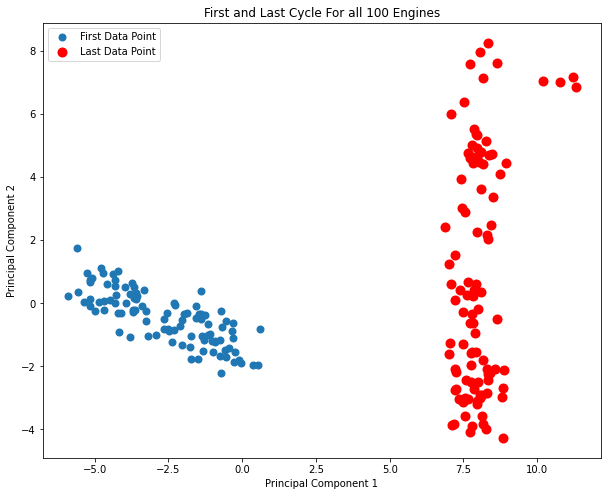

In [72]:
plt.figure(figsize=(10,8))
plt.scatter(X_train_scaled_first_cycle_pca[:,0], X_train_scaled_first_cycle_pca[:,1], linewidths=2)
plt.scatter(X_train_scaled_last_cycle_pca[:,0], X_train_scaled_last_cycle_pca[:,1], linewidths=4, color='red')
plt.title('First and Last Cycle For all 100 Engines')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(labels=['First Data Point', 'Last Data Point'])
plt.show()

- This gives us an impression, generally engines detoriate when they move from left to right in the principal component axis.

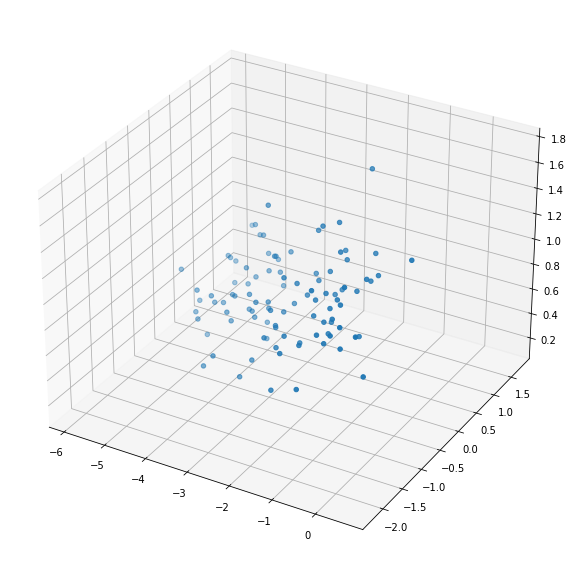

In [73]:
plt.figure(figsize=(10,15))
ax = plt.axes(projection='3d')
ax.scatter3D(X_train_scaled_first_cycle_pca[:,0], X_train_scaled_first_cycle_pca[:,1], X_train_scaled_first_cycle_pca[:,2], cmap='rainbow')
plt.show()

## k-means

In [74]:
from sklearn.cluster import KMeans

### k = 3

In [75]:
k_means = KMeans(n_clusters=3)

In [76]:
k_means.fit(X_train_scaled_pca)

KMeans(n_clusters=3)

In [77]:
k_means.labels_

array([2, 2, 2, ..., 0, 0, 0])

In [78]:
X_train_scaled_pca

array([[-3.24772039e+00, -5.59928677e-01,  7.86111621e-01, ...,
        -8.02173291e-01, -4.29264257e-01,  3.49803905e-01],
       [-2.67941371e+00, -9.31243388e-01,  9.47231170e-01, ...,
         3.92372450e-01, -7.30277507e-01,  1.61754374e-01],
       [-3.27608546e+00, -6.48996903e-01,  7.21534963e-01, ...,
        -5.29949320e-03, -3.61215888e-02, -7.25997836e-02],
       ...,
       [ 8.07821157e+00, -9.45357151e-01,  3.79278379e-01, ...,
         3.15791407e-01,  7.68164860e-02,  1.04114187e-01],
       [ 7.83002531e+00, -9.68530736e-01,  2.27856894e-01, ...,
        -3.55889763e-01, -7.46872102e-01, -2.10446698e-01],
       [ 7.93949944e+00, -1.54589120e+00,  7.81875478e-02, ...,
        -1.60583745e-01,  1.47888528e-01,  1.24169504e-01]])

In [79]:
X_train_scaled_pca[:,0]

array([-3.24772039, -2.67941371, -3.27608546, ...,  8.07821157,
        7.83002531,  7.93949944])

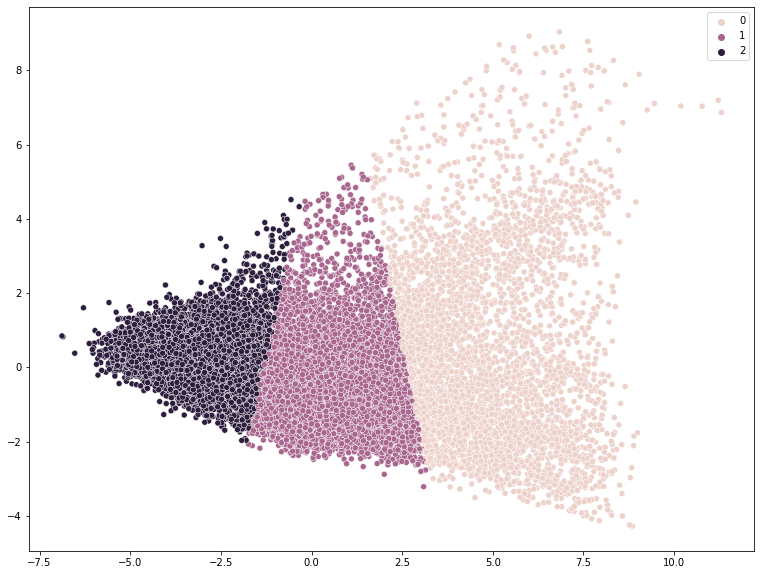

In [80]:
plt.figure(figsize=(13,10))
sns.scatterplot(x=X_train_scaled_pca[:,0], y=X_train_scaled_pca[:,1], hue=k_means.labels_)
plt.show()

### k=4

In [81]:
k_means = KMeans(n_clusters=4)

In [82]:
k_means.fit(X_train_scaled_pca)

KMeans(n_clusters=4)

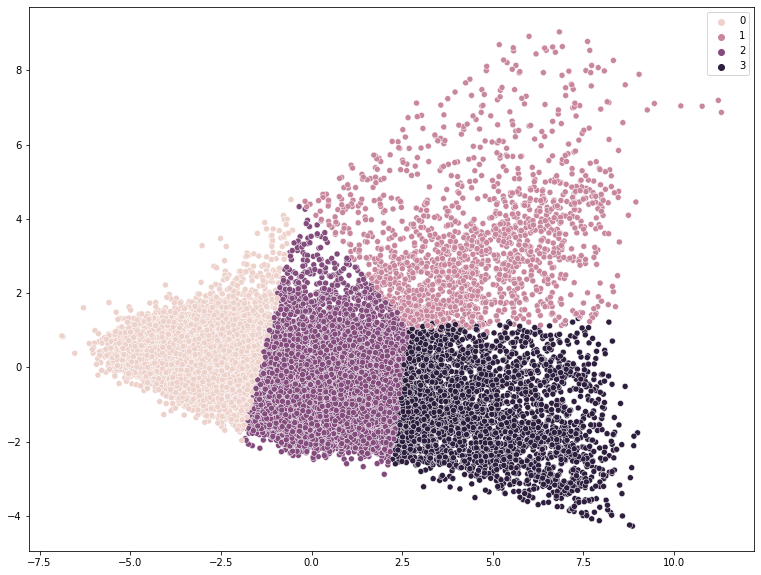

In [83]:
plt.figure(figsize=(13,10))
sns.scatterplot(x=X_train_scaled_pca[:,0], y=X_train_scaled_pca[:,1], hue=k_means.labels_)
plt.show()

#### <font color='red'> Inferences
    - From the PCA plot and when k=3 and k=4, it can be noticed that k=3 is appropriate.

## Support Vector Regression

In [93]:
svm_regr = svm.SVR()
svm_regr.fit(X_train, y_train)

SVR()

In [119]:
y_pred_train = svm_regr.predict(X_train)

In [120]:
y_pred_train

array([104.43407982, 104.42906458, 104.3888189 , ..., 101.07621694,
       101.04299513, 101.05712488])

In [95]:
evaluate(y_train, y_pred_train)

MSE: 4651.588331729744, RMSE:68.20255370387346, r2:0.01955426778163183


In [96]:
y_pred_test = svm_regr.predict(df_test)

In [98]:
evaluate(df_test_rul, y_pred_test)

MSE: 2393.641741996495, RMSE:48.92485811932923, r2:-0.38611609237692046


- How can r2 be negative?
https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative#:~:text=R2%20compares%20the%20fit,violating%20any%20rules%20of%20math.

In [61]:
class Build_Model:
    '''
    Inputs
    - Model 
    - X_train
    - y_train
    - X_test
    - y_test
    '''
    def __init__(self, model, X_train, y_train, X_test, y_test):
        '''
        InitialiZe the model with the given parameters
        '''
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.model_def = model.fit(X_train, y_train)
        
    def evaluate_train_dataset(self, X_train=None, y_train=None):
        '''
        Evaluate the train dataset and returns the RMSE and r2 score
        '''
        if X_train is None and y_train is None:
            X_train = self.X_train
            y_train = self.y_train
        self.y_pred_train = self.model_def.predict(X_train)
        self.mse = mean_squared_error(y_train, self.y_pred_train)
        self.rmse = np.sqrt(self.mse)
        self.r2 = r2_score(y_train, self.y_pred_train)
        return self.rmse, self.r2, self.y_pred_train
    
    def evaluate_test_dataset(self, X_test=None, y_test=None):
        '''
        Evaluate the test dataset and returns the RMSE and r2 score
        '''
        if X_test is None and y_test is None:
            X_test = self.X_test
            y_test = self.y_test
        self.y_pred_test = self.model_def.predict(X_test)
        self.mse = mean_squared_error(y_test, self.y_pred_test)
        self.rmse = np.sqrt(self.mse)
        self.r2 = r2_score(y_test, self.y_pred_test)
        return self.rmse, self.r2, self.y_pred_test

In [168]:
class Build_Model:
    '''
    Inputs
    - Model 
    - X_train
    - y_train
    - X_test
    - y_test
    '''
    def __init__(self, model, X_train, y_train, X_test, y_test):
        '''
        InitialiZe the model with the given parameters
        '''
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.model_def = model.fit(X_train, y_train)
        
    def evaluate_train_dataset(self):
        '''
        Evaluate the train dataset and returns the RMSE and r2 score
        '''
        self.y_pred_train = self.model_def.predict(self.X_train)
        self.mse = mean_squared_error(self.y_train, self.y_pred_train)
        self.rmse = np.sqrt(self.mse)
        self.r2 = r2_score(self.y_train, self.y_pred_train)
        return self.rmse, self.r2, self.y_pred_train
    
    def evaluate_test_dataset(self):
        '''
        Evaluate the test dataset and returns the RMSE and r2 score
        '''
        self.y_pred_test = self.model_def.predict(self.X_test)
        self.mse = mean_squared_error(self.y_test, self.y_pred_test)
        self.rmse = np.sqrt(self.mse)
        self.r2 = r2_score(self.y_test, self.y_pred_test)
        return self.rmse, self.r2, self.y_pred_test

In [153]:
svr_t = Build_Model(svm_regr, X_train, y_train, df_test, df_test_rul)

In [154]:
svr_t.evaluate_train_dataset()

(68.20255370387346,
 0.01955426778163183,
 array([104.43407982, 104.42906458, 104.3888189 , ..., 101.07621694,
        101.04299513, 101.05712488]))

In [133]:
svr_t.evaluate_test_dataset()

(48.92485811932923, -0.38611609237692046)

### Hyperparameter Tuning

In [ ]:
# from sklearn.model_selection import GridSearchCV

In [ ]:
# param_search_space = {
#     'kernel': ['rbf'],
#     'gamma': [0.1,0.2,0.3],
#     'C': [1,10,100]
# }

In [ ]:
# grid = GridSearchCV(estimator=svm_regr, param_grid=param_search_space, cv=5, verbose=4, n_jobs=4)

In [ ]:
# grid.fit(X_train_scaled, y_train)

In [ ]:
# grid.best_score_

In [ ]:
# grid.best_params_

## Decesion Tree Regression

In [ ]:
from 